# Viral Tweets

In this project, ı used the K-Nearest Neighbor algoritm to predict whether a tweet will go viral. First consider the probelem ı'm trying to solve. Which features are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity.Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

## Explore Data

Let's look:
* The total number of tweets in the dataset.
* The columns, or features, of the dataset.
* The text of the first tweet in the dataset.

Some of these features are dictionaries. For example, the feature `"user"` is a dictionary. We might want to use some of the information found in these sub-dictionaries.

In [1]:
import pandas as pd
all_tweets = pd.read_json("random_tweets.json", lines=True)

In [3]:
print("**Length of data")
print(len(all_tweets))
print("**Columns of Dataset")
print(all_tweets.columns)
print("**Example tweet")
print(all_tweets.loc[0]['text'])
print("**Example tweet location")
print(all_tweets.loc[0]['user']['location'])

**Length of data
11099
**Columns of Dataset
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
**Example tweet
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
**Example tweet location
Waterloo, Iowa


## Defining Viral Tweets

A K-Nearest Neighbor classifier is a supervised machine learning algorithm, and as a result, we need to have a dataset with tagged labels. For this specific example, we need a dataset where every tweet is marked as viral or not viral. Unfortunately, this isn't a feature of our dataset &mdash; we'll need to make it ourselves.

So how do we define a viral tweet? A good place to start is to look at the number of retweets the tweet has. This can be found using the feature `"retweet_count"`. Let's say we wanted to create a column called `is_viral` that is a `1` if the tweet had more than `"median of reetweet count"`  retweets and `0` otherwise. 

In [4]:
import numpy as np

median_retweets = all_tweets['retweet_count'].median()
print("Median of our dataset's reetweets")
print(median_retweets)
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] >= median_retweets, 1, 0)
print(all_tweets['is_viral'].value_counts())

Median of our dataset's reetweets
13.0
1    5591
0    5508
Name: is_viral, dtype: int64


## Making Features

Now that we've created a label for every tweet in our dataset, we can begin thinking about which features might determine whether a tweet is viral. We can create new columns in our dataset to represent these features. For example, let's say we think the length of a tweet might be a valuable feature. And also we can use features that `followers_count` and `friends_count`.

In [5]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

 A variable named labels  equal to the 'is_viral' column of all_tweets.
 
 A variable named data equal to columns which `tweet_length`, `followers_count`, and `friends_count`.
 
 The scale function will normalize the data so all of the features will vary within the same range.

In [7]:
from sklearn.preprocessing import scale

labels = all_tweets['is_viral']
data = all_tweets[['tweet_length','followers_count','friends_count']]
scaled_data = scale(data, axis=0)


## Creating the Training Set and Test Set

To evaluate the effectiveness of our classifier, we now split scaled_data and labels into a training set and test set using scikit-learn's train_test_split function. This function takes two required parameters: It takes the data, followed by the labels. Set the optional parameter test_size to be 0.2.

Don't fotget, this function returns 4 items in this order:

1. The training data
2. The testing data
3. The training labels
4. The testing labels

Store the results in variables named `train_data`, `test_data`, `train_labels`, and `test_labels`.

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

## Using the Classifier

Use K-Nearest classifier. For begin k parameter equal to 5. After that, train our model by calling `fit()` method with  `train_data` and `train_labels` as parameters.

Next, ı want to know my model's score. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.5905405405405405


## Choosing K

We've tested our classifier with k = 5, but maybe there's a k that will work better. Let's test many different values for k and graph the results. Let's find best value of k.

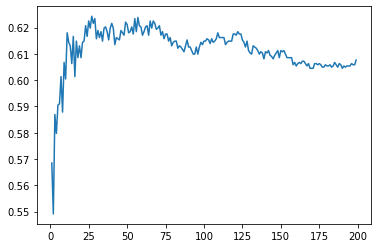

In [12]:
import matplotlib.pyplot as plt

scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.plot(range(1,200), scores)
plt.show()

In [13]:
print(scores.index(max(scores)))

26


## Tuning

In [15]:
classifier_tuned = KNeighborsClassifier(n_neighbors = scores.index(max(scores)))
classifier_tuned.fit(train_data, train_labels)
print(classifier_tuned.score(test_data, test_labels))

0.6198198198198198
